### Data Analysis for Sustainbility Report

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_path):
    if not os.path.exists(file_path):
        print("Error: File not found.")
        return None
    else:
        df = pd.read_csv(file_path)
        return df

### Industry Classification Analysis

In [3]:
def industry_analysis(csv_file):
    df = read_csv(csv_file)
    print("file shape: ", df.shape)

    # number of reports in different industries
    industry_distribution = df["Industry"].value_counts()
    print(industry_distribution)

    # histgram
    plt.figure(figsize=(10, 6))
    df["Industry"].value_counts().plot(kind='bar')
    plt.title("Industry Distribution")
    plt.xlabel("Industry")
    plt.ylabel("Number")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

file shape:  (187, 17)
Industry
Banks                                           42
Electric and Gas Utilities                      23
Insurance                                       22
Oil and Gas                                     19
Asset Managers                                  14
Metals and Mining                                9
IT and Communications Services                   7
Real Estate Management and Development           7
Asset Owners                                     6
Maritime Transportation                          4
Manufacturing                                    3
Capital Goods                                    3
Construction Materials                           3
Automobiles and Components                       3
Chemicals                                        3
Multi-Utilities                                  2
Diversified Financials                           2
Beverages                                        2
Services                                         2

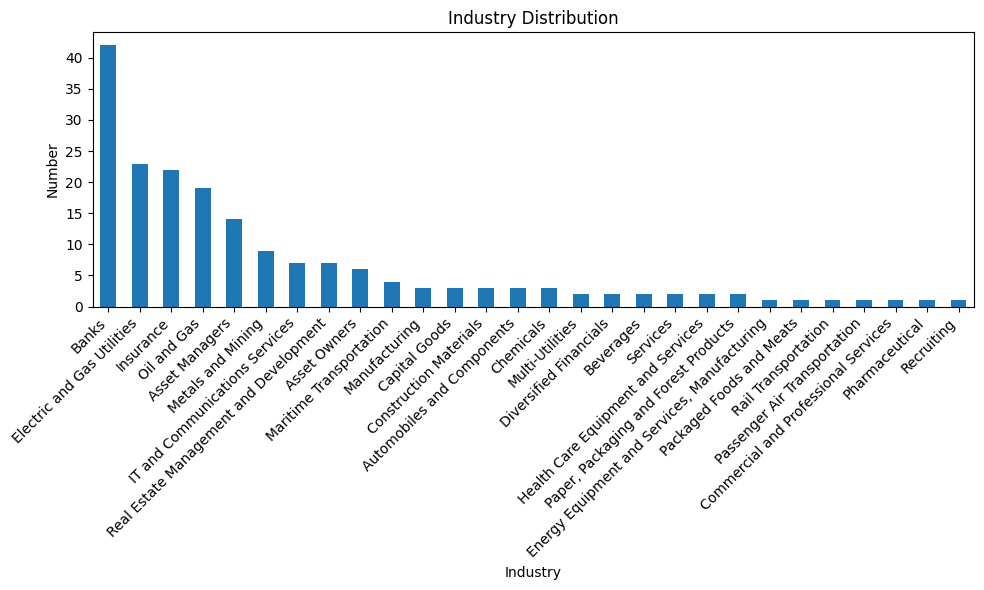

In [4]:
if __name__ == "__main__":
    file = "./output/merge_onehot.csv"  
    industry_analysis(file)

### Distribution of Different Types

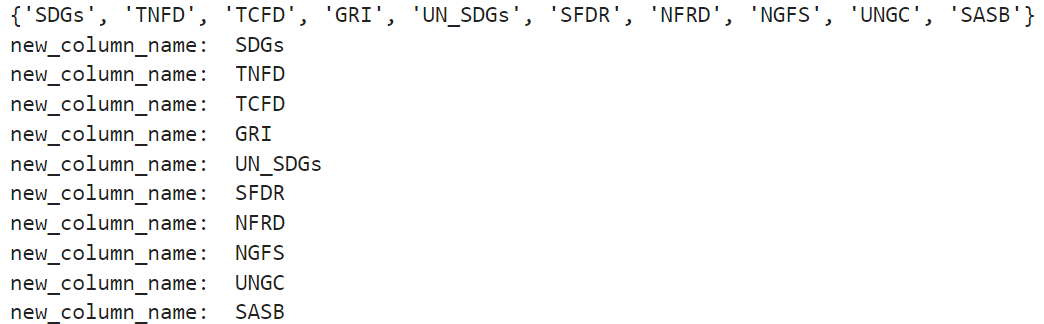

In [5]:
def type_distribution(csv_file):
    df = read_csv(csv_file)
    
    distribution = {'SDGs':0, 'TNFD':0, 'TCFD':0, 'GRI':0, 'UN_SDGs':0, 'SFDR':0, 'NFRD':0, 'NGFS':0, 'UNGC':0, 'SASB':0}
    
    # count the number of value=1
    for col in distribution:
        if col in df.columns:
            distribution[col] = df[col].sum()

    # sort 
    sorted_distribution = dict(sorted(distribution.items(), key=lambda item: item[1], reverse=True))
    print(sorted_distribution)
    
    # plot the histgram
    plt.figure(figsize=(8, 6))
    bars = plt.bar(sorted_distribution.keys(), sorted_distribution.values())
    plt.title("Types Distribution")
    plt.xlabel("Types")
    plt.ylabel("Number")
    plt.xticks(rotation=45)
    plt.tight_layout()

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom')
   
    plt.show()

{'TCFD': 137, 'GRI': 74, 'SASB': 40, 'UNGC': 10, 'SDGs': 4, 'UN_SDGs': 2, 'TNFD': 1, 'SFDR': 1, 'NFRD': 1, 'NGFS': 1}


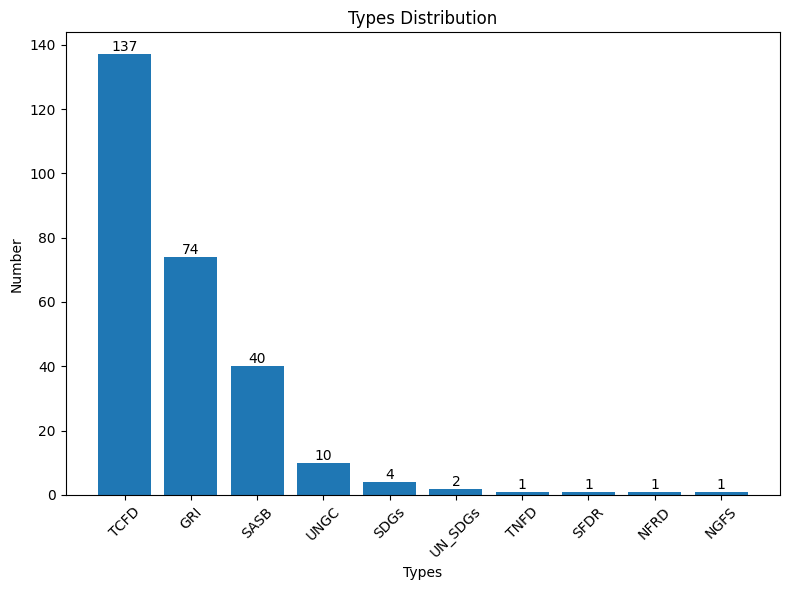

In [6]:
if __name__ == "__main__":
    merge_file = "./output/merge_onehot.csv"
    type_distribution(merge_file)

In [7]:
def only_tcfd(csv_file):
    df = pd.read_csv(csv_file)

    types = ['SDGs', 'TNFD', 'TCFD', 'GRI', 'UN_SDGs', 'SFDR', 'NFRD', 'NGFS', 'UNGC', 'SASB']

    # count
    tcfd_count = ((df["TCFD"] == 1) & (df[types].sum(axis=1) == 1)).sum()
    
    # percentage 
    total_files = len(df)
    tcfd_percentage = tcfd_count / total_files * 100 if total_files > 0 else 0
    
    return tcfd_count, tcfd_percentage

In [8]:
if __name__ == "__main__":
    merge_file = "./output/merge_onehot.csv"
    num, percentage = only_tcfd(merge_file)
    print("The number of only TCFD: ", num)
    print("The percentage of only TCFD in 187 files: ", f"{percentage:.2f}%")

The number of only TCFD:  97
The percentage of only TCFD in 187 files:  51.87%
